In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from os import path
# sns.set_theme(style="whitegrid", palette="bright")

# Reading Data

In [41]:
df = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom.data", delimiter=" ", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [42]:
labels = pd.read_csv("/Users/aprajita/Downloads/secom(2)/secom_labels.data", delimiter=" ", header=None)
labels.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [43]:
labels.shape

(1567, 2)

In [44]:
df.shape

(1567, 590)

# Correlation Analysis

In [45]:
c_matrix = df.corr()
c_matrix.shape

(590, 590)

<Axes: >

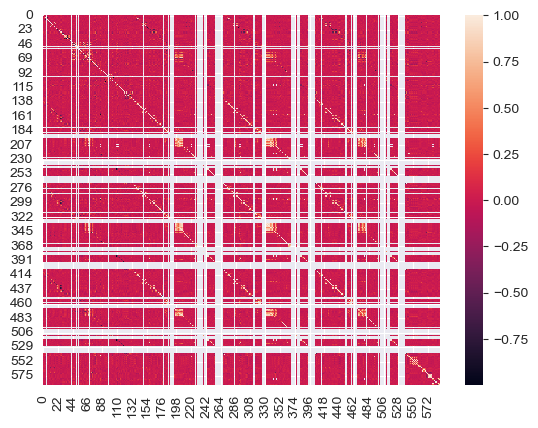

In [46]:
sns.heatmap(c_matrix)

In [47]:
c_matrix.isna().sum()

0      116
1      116
2      116
3      116
4      116
      ... 
585    116
586    116
587    116
588    116
589    116
Length: 590, dtype: int64

In [48]:
c_matrix[c_matrix.isna().sum() > 200].index.to_numpy()

array([  5,  13,  42,  49,  52,  69,  97, 141, 149, 178, 179, 186, 189,
       190, 191, 192, 193, 194, 226, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 240, 241, 242, 243, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327,
       328, 329, 330, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379,
       380, 381, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
       414, 422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 481,
       498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514,
       515, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538])

In [49]:
df[13].value_counts()

13
0.0    1564
Name: count, dtype: int64

In [50]:
labels[0]

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: 0, Length: 1567, dtype: int64

In [51]:
c_with_label = df.corrwith(labels[0]).sort_values(ascending=False)
temp_df = pd.DataFrame(c_with_label.reset_index())
temp_df.head()

/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/obeta-group-5/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,index,0
0,59,0.155796
1,103,0.151203
2,510,0.131593
3,348,0.130180
4,158,0.121258


In [52]:
temp_df["abs_value"] = temp_df[0].abs()

In [53]:
temp_df.columns

Index(['index', 0, 'abs_value'], dtype='object')

<Axes: xlabel='index', ylabel='0'>

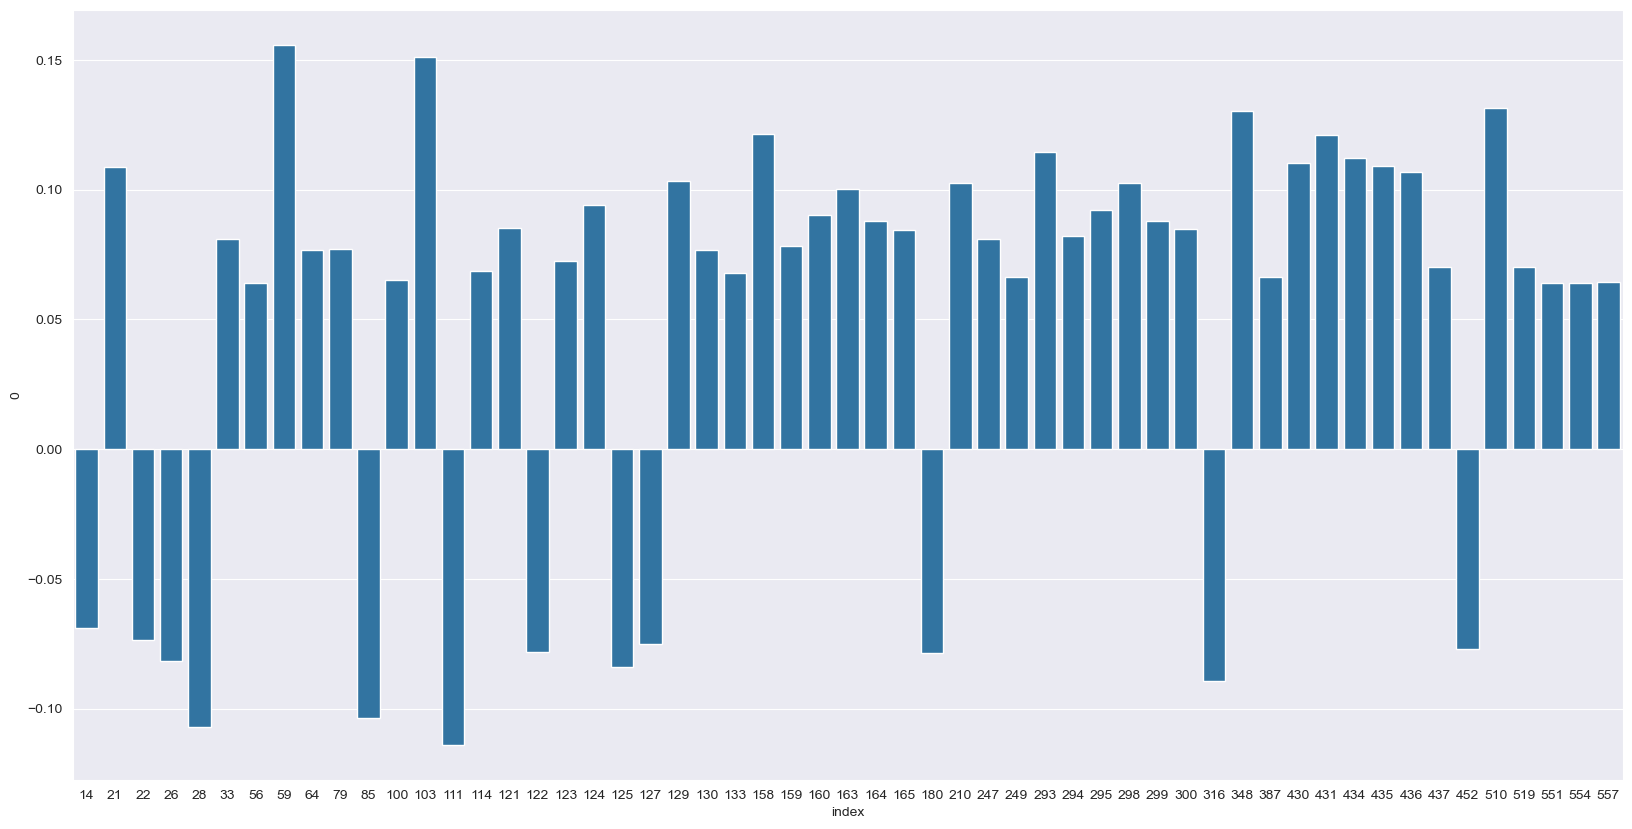

In [54]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=temp_df.sort_values(by="abs_value", ascending=False).head(55),
    x="index",
    y=0,
)

<Axes: xlabel='None'>

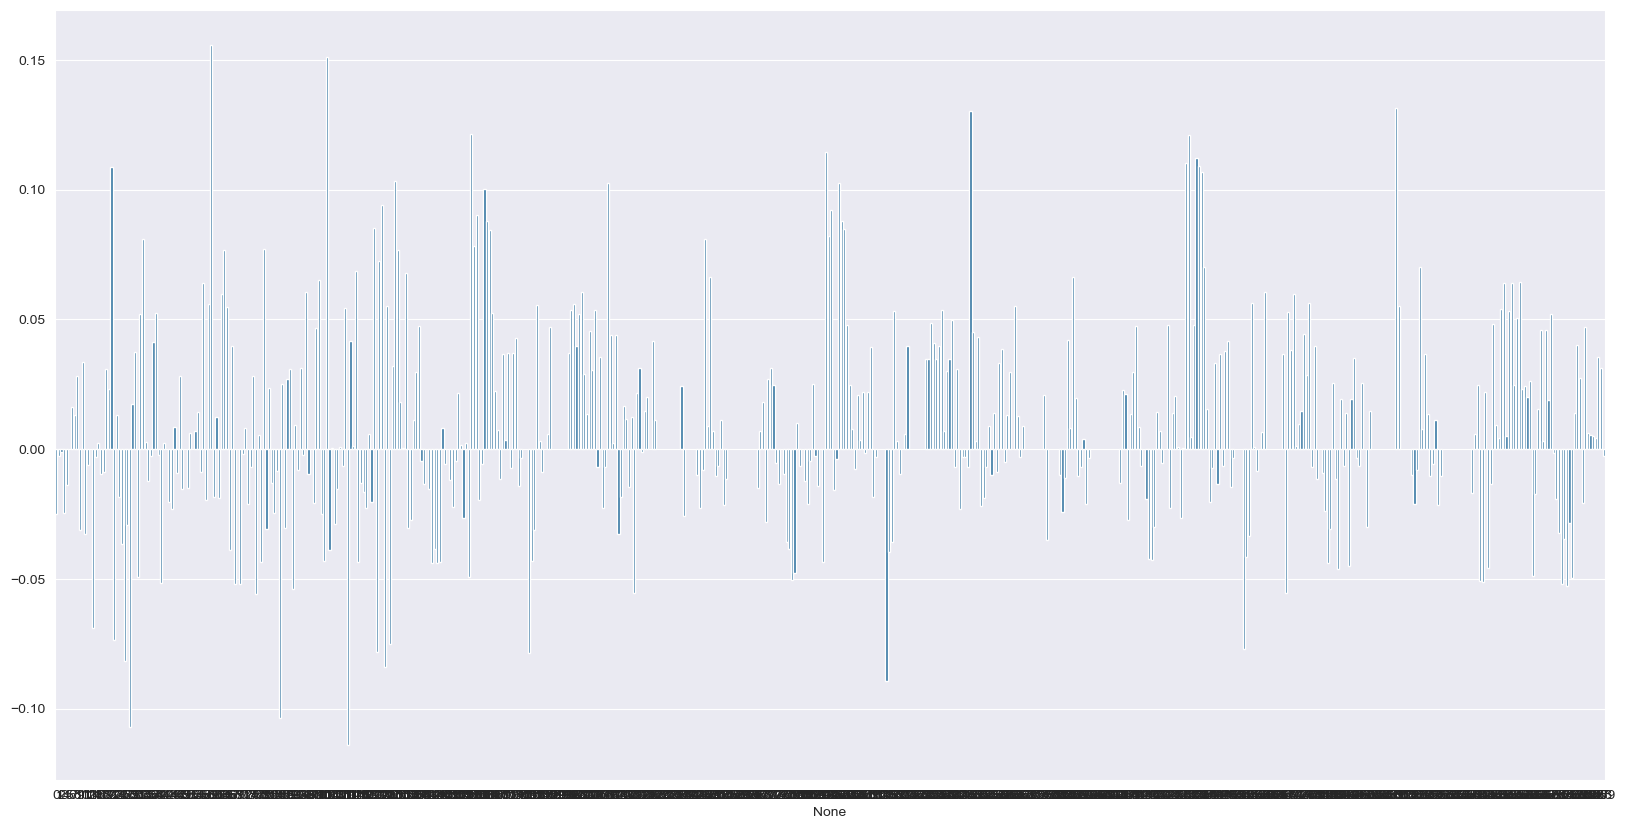

In [56]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x=c_with_label.index,
    y=c_with_label.values
)

** YOU ARE LOOKING FOR COLUMNS THAT ARE HIGHLY CORRELATED WITH THE LABELS. BUT NOT CORRELATED TO EACH OTHER **

In [57]:
labels.columns

Index([0, 1], dtype='int64')

In [58]:
labels[0].value_counts()

0
-1    1463
 1     104
Name: count, dtype: int64